## Italian DCP Covid-19 Data Analysis (*Regional-level*)

***
#### Table of Contents

- [Data Reading](#read)
- [Data Cleaning](#clean)
- [Data Manipulation](#manipulation)
- [Data Selection](#selection)
- [Visualization](#plots)

In [326]:
%run setup.ipynb

### Data Reading <a class='anchor' id='read'></a>

In [327]:
# Constructs the full file path for the CSV file
path = os.path.join(DATA_PATH, "dpc-covid19-ita-regioni.csv")
    
try:
    with open(path, "r") as file:
        regioni = pd.read_csv(file)
        regioni.drop(columns=['note','codice_nuts_1','codice_nuts_2','note_test','note_casi'], inplace=True)
        regioni.data = regioni.data.apply(lambda L: L.partition('T')[0])
        regioni['data']=pd.to_datetime(regioni['data'])
        regioni['DateIndex'] = regioni['data']
        regioni.set_index(['denominazione_regione','DateIndex'], inplace=True)
        regioni.sort_index(level=[0,1], inplace=True)
except FileNotFoundError:
    print("The specified CSV file was not found.")


display(regioni.tail())
regioni.info()

data stato  codice_regione        lat  \
denominazione_regione DateIndex                                                
Veneto                2023-02-12 2023-02-12   ITA               5  45.434905   
                      2023-02-13 2023-02-13   ITA               5  45.434905   
                      2023-02-14 2023-02-14   ITA               5  45.434905   
                      2023-02-15 2023-02-15   ITA               5  45.434905   
                      2023-02-16 2023-02-16   ITA               5  45.434905   

                                       long  ricoverati_con_sintomi  \
denominazione_regione DateIndex                                       
Veneto                2023-02-12  12.338452                     250   
                      2023-02-13  12.338452                     249   
                      2023-02-14  12.338452                     236   
                      2023-02-15  12.338452                     251   
                      2023-02-16  12.338452                     260   

                                  terapia_intensiva  totale_ospedalizzati  \
denominazione_regione DateIndex                                             
Veneto                2023-02-12                 18                   268   
                      2023-02-13                 19                   268   
                      2023-02-14                 14                   250   
                      2023-02-15                 14                   265   
                      2023-02-16                 14                   274   

                                  isolamento_domiciliare  totale_positivi  \
denominazione_regione DateIndex                                             
Veneto                2023-02-12                   15805            16073   
                      2023-02-13                   15333            15601   
                      2023-02-14                   15536            15786   
                      2023-02-15                   15800            16065   
                      2023-02-16                   16078            16352   

                                  ...  casi_da_sospetto_diagnostico  \
denominazione_regione DateIndex   ...                                 
Veneto                2023-02-12  ...                           NaN   
                      2023-02-13  ...                           NaN   
                      2023-02-14  ...                           NaN   
                      2023-02-15  ...                           NaN   
                      2023-02-16  ...                           NaN   

                                  casi_da_screening  totale_casi   tamponi  \
denominazione_regione DateIndex                                              
Veneto                2023-02-12                NaN      2683304  36823912   
                      2023-02-13                NaN      2683392  36826070   
                      2023-02-14                NaN      2684275  36852032   
                      2023-02-15                NaN      2684912  36870904   
                      2023-02-16                NaN      2685547  36889484   

                                  casi_testati  ingressi_terapia_intensiva  \
denominazione_regione DateIndex                                              
Veneto                2023-02-12     5281137.0                         1.0   
                      2023-02-13     5281304.0                         2.0   
                      2023-02-14     5282379.0                         1.0   
                      2023-02-15     5283172.0                         3.0   
                      2023-02-16     5284166.0                         2.0   

                                  totale_positivi_test_molecolare  \
denominazione_regione DateIndex                                     
Veneto                2023-02-12                        1055860.0   
                      2023-02-13                        1055833.0   
                      2023-02-14

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22869 entries, ('Abruzzo', Timestamp('2020-02-24 00:00:00')) to ('Veneto', Timestamp('2023-02-16 00:00:00'))
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   data                                    22869 non-null  datetime64[ns]
 1   stato                                   22869 non-null  object        
 2   codice_regione                          22869 non-null  int64         
 3   lat                                     22869 non-null  float64       
 4   long                                    22869 non-null  float64       
 5   ricoverati_con_sintomi                  22869 non-null  int64         
 6   terapia_intensiva                       22869 non-null  int64         
 7   totale_ospedalizzati                    22869 non-null  int64         
 8   isolamento_domiciliare                  228

<br>

In [328]:
display(regioni.loc['Abruzzo','lat'].head())
#display(regioni.loc['Abruzzo','lat']/) 
new = np.round(regioni.loc['Abruzzo','lat'] / 2)
display(new) 
#regioni.loc['Abruzzo','lat'] = (regioni.loc['Abruzzo','lat'] / 2)

#regioni.loc['Abruzzo','lat'] = new.values
#regioni.loc['Abruzzo','lat'].head()
#regioni.loc['Abruzzo']['lat'].head()
#regioni.info()

DateIndex
2020-02-24    42.351222
2020-02-25    42.351222
2020-02-26    42.351222
2020-02-27    42.351222
2020-02-28    42.351222
Name: lat, dtype: float64

DateIndex
2020-02-24    21.0
2020-02-25    21.0
2020-02-26    21.0
2020-02-27    21.0
2020-02-28    21.0
              ... 
2023-02-12    21.0
2023-02-13    21.0
2023-02-14    21.0
2023-02-15    21.0
2023-02-16    21.0
Name: lat, Length: 1089, dtype: float64

### Data Cleaning <a class='anchor' id='clean'></a>

In [329]:
# Mention variables that were not available at the beginning of the pandemic
regioni.isnull().sum(0)

data                                          0
stato                                         0
codice_regione                                0
lat                                           0
long                                          0
ricoverati_con_sintomi                        0
terapia_intensiva                             0
totale_ospedalizzati                          0
isolamento_domiciliare                        0
totale_positivi                               0
variazione_totale_positivi                    0
nuovi_positivi                                0
dimessi_guariti                               0
deceduti                                      0
casi_da_sospetto_diagnostico              19467
casi_da_screening                         19467
totale_casi                                   0
tamponi                                       0
casi_testati                               1155
ingressi_terapia_intensiva                 5943
totale_positivi_test_molecolare         

## Data Manipulation <a class='anchor' id='manipulation'></a>

In [330]:
pops = pd.read_csv(f'{DATA_PATH}/istat_pop_media.csv', index_col=0)
display(pops.head()) 
#pop_regions = pops[pops.index.isin(regioni['denominazione_regione'].unique())]
pop_regions = pops[pops.index.isin(regioni.index.get_level_values(0).unique())]
pop_regions.head()

,mean_population
Italia,59302611.0
Nord-ovest,15906568.0
Piemonte,4280837.0
Torino,2219507.0
Vercelli,167352.0


,mean_population
Piemonte,4280837.0
Valle d'Aosta,124161.0
Liguria,1517516.0
Lombardia,9984053.0
P.A. Bolzano,533391.0


In [331]:
def std_columns(pop_df, df, col_names):
    # Loop through each column name in the list of column names
    for col_name in col_names:
        # Create a new column name by adding '_100k' to the original column name
        new_col_name = col_name + '_100k'
        # Create a new column with the new column name and fill it with NaN values
        df[new_col_name] = np.NAN

        # Loop through each region and its corresponding population in the population dataframe
        for index, row in pop_df.iterrows():
            region = index
            pop = row[0]
            
            # Calculate the new values for the new column for the current region
            # by dividing the values in the original column by the population and multiplying by 100,000
            # Round the result to 2 decimal places

            new_col = np.round((df.loc[region, col_name] / pop) * 100000, 0)

            # Update the new column with the new values for the current region
            df.loc[region, new_col_name] = new_col.values
            #df.loc[region, new_col_name] = np.round((df.loc[region, col_name] / pop) * 100000, 2) 

    # Return the updated DataFrame
    return df


In [332]:

#new_values = np.round((regioni.loc['Abruzzo'][col_name] / 3 ) * 100000, 2)
#display(new_values.tail())
# Update the new column with the new values for the current region
#regioni.loc['Abruzzo'][new_col_name] = new_values

We want to compute a 7-days moving average for the 'New Positives' column between each region.
Considering a 7-day moving average for the "New Positives" variable in COVID data analysis can help to reduce the noise or fluctuations in the data and provide a more accurate representation of the underlying trend.

The daily number of new COVID cases can be affected by various factors such as *testing capacity, reporting delays, and fluctuations in the spread of the virus.* This can result in **large fluctuations in the daily numbers that may not necessarily reflect the true trend of the outbreak.** By calculating the moving average over a period of 7 days, these fluctuations can be smoothed out, and the underlying trend of the outbreak can be better visualized. 

The `rolling()` function in Pandas can be used to compute rolling statistics over a specified window size. In this case, we want to compute the rolling average of the `"nuovi_positivi"` column for each region over a window size of 7 days. 
This code groups the DataFrame by `"denominazione_regione"` and then applies the `rolling()` function to the `"nuovi_positivi"` column for each group with a window size of 7 days. The resulting object is a Pandas Series with hierarchical index containing the rolling average values for each day and region.

The hierarchical index of the Pandas series returned by the first line of code would consist of three levels. The first level would correspond to the 'denominazione_regione' column, which is the region name, since the original DataFrame was grouped by this column. The second level would correspond to the 'denominazione_regione' column of the original DataFrame, and the third level would correspond to the datetime index of the original DataFrame.

To extract the rolling average values from the Series and add them as a new column to the original DataFrame, we can use the `reset_index()` function to **remove the groupby index from the Series** and then use pd.concat() to show that we can concatenate the original DataFrame and a new DataFrame containing the rolling average values.

In [333]:
display(regioni.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().tail(8))
reseind = regioni.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().reset_index(level=0, drop=True)
pd.concat([regioni, pd.DataFrame(reseind)], axis=1)

denominazione_regione  denominazione_regione  DateIndex 
Veneto                 Veneto                 2023-02-09    563.857143
                                              2023-02-10    566.000000
                                              2023-02-11    548.714286
                                              2023-02-12    535.285714
                                              2023-02-13    525.000000
                                              2023-02-14    508.571429
                                              2023-02-15    497.571429
                                              2023-02-16    505.714286
Name: nuovi_positivi, dtype: float64

data stato  codice_regione        lat  \
denominazione_regione DateIndex                                                
Abruzzo               2020-02-24 2020-02-24   ITA              13  42.351222   
                      2020-02-25 2020-02-25   ITA              13  42.351222   
                      2020-02-26 2020-02-26   ITA              13  42.351222   
                      2020-02-27 2020-02-27   ITA              13  42.351222   
                      2020-02-28 2020-02-28   ITA              13  42.351222   
...                                     ...   ...             ...        ...   
Veneto                2023-02-12 2023-02-12   ITA               5  45.434905   
                      2023-02-13 2023-02-13   ITA               5  45.434905   
                      2023-02-14 2023-02-14   ITA               5  45.434905   
                      2023-02-15 2023-02-15   ITA               5  45.434905   
                      2023-02-16 2023-02-16   ITA               5  45.434905   

                                       long  ricoverati_con_sintomi  \
denominazione_regione DateIndex                                       
Abruzzo               2020-02-24  13.398438                       0   
                      2020-02-25  13.398438                       0   
                      2020-02-26  13.398438                       0   
                      2020-02-27  13.398438                       1   
                      2020-02-28  13.398438                       1   
...                                     ...                     ...   
Veneto                2023-02-12  12.338452                     250   
                      2023-02-13  12.338452                     249   
                      2023-02-14  12.338452                     236   
                      2023-02-15  12.338452                     251   
                      2023-02-16  12.338452                     260   

                                  terapia_intensiva  totale_ospedalizzati  \
denominazione_regione DateIndex                                             
Abruzzo               2020-02-24                  0                     0   
                      2020-02-25                  0                     0   
                      2020-02-26                  0                     0   
                      2020-02-27                  0                     1   
                      2020-02-28                  0                     1   
...                                             ...                   ...   
Veneto                2023-02-12                 18                   268   
                      2023-02-13                 19                   268   
                      2023-02-14                 14                   250   
                      2023-02-15                 14                   265   
                      2023-02-16                 14                   274   

                                  isolamento_domiciliare  totale_positivi  \
denominazione_regione DateIndex                                             
Abruzzo               2020-02-24                       0                0   
                      2020-02-25                       0                0   
                      2020-02-26                       0                0   
                      2020-02-27                       0                1   
                      2020-02-28                       0                1   
...                                                  ...              ...   
Veneto                2023-02-12                   15805            16073   
                      2023-02-13                   15333            15601   
                      2023-02-14                   15536            15786   
                      2023-02-15                   15800            16065   
                      2023-02-16                   16078            16352   

                                  ...  casi_da_screening  totale_casi 

In [334]:
import warnings

# Use the filterwarnings function to ignore the warning messages
#warnings.filterwarnings('ignore')


# Apply the std_columns function to standardize columns with population count and create new ones
regioni = std_columns(pop_regions, regioni, ['totale_positivi','nuovi_positivi','deceduti','totale_casi'])

# Add a new column to represent the number of days from lockdown (2020-03-09)
regioni.insert(1, "days_from_lock", regioni['data'] - pd.to_datetime('2020-03-09'))

# Add a new column 'nuovi_positivi_ma' representing the rolling 7-day average of 'nuovi_positivi' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi' for each region
regioni.insert(14, "nuovi_positivi_ma", regioni.groupby('denominazione_regione')['nuovi_positivi'].rolling(7).mean().reset_index(level=0, drop=True))

# Add a new column 'nuovi_positivi_100k_ma' representing the rolling 7-day average of 'nuovi_positivi_100k' for each region
# A rolling average is computed by taking the mean of the last 7 values of 'nuovi_positivi_100k' for each region
regioni.insert(len(regioni.columns)-2, "nuovi_positivi_100k_ma", regioni.groupby('denominazione_regione')['nuovi_positivi_100k'].rolling(7).mean().reset_index(level=0, drop=True))

# Reset the warning filter to its default state
warnings.filterwarnings('default')
regioni.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22869 entries, ('Abruzzo', Timestamp('2020-02-24 00:00:00')) to ('Veneto', Timestamp('2023-02-16 00:00:00'))
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype          
---  ------                                  --------------  -----          
 0   data                                    22869 non-null  datetime64[ns] 
 1   days_from_lock                          22869 non-null  timedelta64[ns]
 2   stato                                   22869 non-null  object         
 3   codice_regione                          22869 non-null  int64          
 4   lat                                     22869 non-null  float64        
 5   long                                    22869 non-null  float64        
 6   ricoverati_con_sintomi                  22869 non-null  int64          
 7   terapia_intensiva                       22869 non-null  int64          
 8   totale_ospedalizzati             

This code block shows an example of how the computed 7-day moving average of daily new positives is fine. A plot is computed comparing the raw data to the smoothed data for a single region (in this case, Emilia-Romagna).

The code uses the query method to select only the rows in the reg_selection dataframe where the denominazione_regione column is equal to "Emilia-Romagna". It then plots the `nuovi_positivi_100k` column (daily new positives per 100,000 people) as a grey dotted line labeled *"Emilia-Romagna RAW"*, and the `nuovi_positivi_100k_ma` column (7-day moving average of daily new positives per 100,000 people) as a purple line labeled *"Emilia-Romagna 7D-MA"* on the same plot using plot method.

Text(0.04, -0.15, 'Source: Italian Civil Protection')

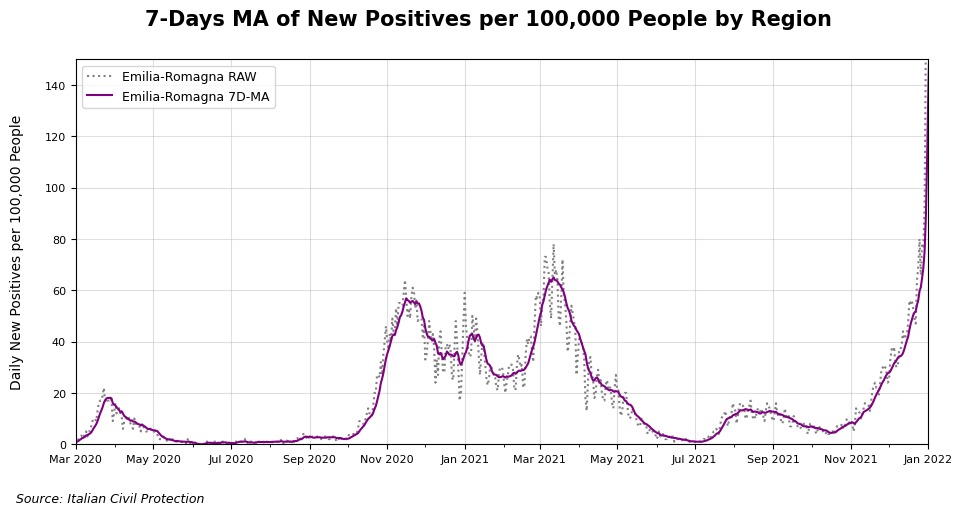

In [335]:
# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))

# Select only the data for the Emilia-Romagna region
ER_regione = regioni.loc['Emilia-Romagna']

# Plot the raw data and the 7-day moving average for Emilia-Romagna
ER_regione.plot(x='data', y='nuovi_positivi_100k', label='Emilia-Romagna RAW', ax=ax, color='grey', ls=':' )
ER_regione.plot(x='data', y='nuovi_positivi_100k_ma', label='Emilia-Romagna 7D-MA', ax=ax, color='purple')

# Format the x-axis with a date formatter and tick locator
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 3  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)

# Format the x- and y-axis tick labels
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)

# Set the x- and y-axis limits
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 150))

# Add x- and y-axis labels and a suptitle
plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')

# Add a grid and legend to the plot
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")


In [336]:
reg_selection = ['Lombardia', 'Veneto', 'Piemonte', 'Liguria','Emilia-Romagna','Toscana', 'Marche']
#reg_selection = regioni[regioni.index.isin(reg_selection)]
reg_selection = regioni.loc[reg_selection,:]
#reg_selection.set_index(['denominazione_regione','data'], inplace=True)
display(reg_selection.head())

#regioni.set_index(['denominazione_regione','DateIndex'], inplace=True)
#regioni.sort_index(level=[0,1], inplace=True)

data days_from_lock stato  \
denominazione_regione DateIndex                                    
Lombardia             2020-02-24 2020-02-24       -14 days   ITA   
                      2020-02-25 2020-02-25       -13 days   ITA   
                      2020-02-26 2020-02-26       -12 days   ITA   
                      2020-02-27 2020-02-27       -11 days   ITA   
                      2020-02-28 2020-02-28       -10 days   ITA   

                                  codice_regione        lat      long  \
denominazione_regione DateIndex                                         
Lombardia             2020-02-24               3  45.466794  9.190347   
                      2020-02-25               3  45.466794  9.190347   
                      2020-02-26               3  45.466794  9.190347   
                      2020-02-27               3  45.466794  9.190347   
                      2020-02-28               3  45.466794  9.190347   

                                  ricoverati_con_sintomi  terapia_intensiva  \
denominazione_regione DateIndex                                               
Lombardia             2020-02-24                      76                 19   
                      2020-02-25                      79                 25   
                      2020-02-26                      79                 25   
                      2020-02-27                     172                 41   
                      2020-02-28                     235                 47   

                                  totale_ospedalizzati  \
denominazione_regione DateIndex                          
Lombardia             2020-02-24                    95   
                      2020-02-25                   104   
                      2020-02-26                   104   
                      2020-02-27                   213   
                      2020-02-28                   282   

                                  isolamento_domiciliare  ...  \
denominazione_regione DateIndex                           ...   
Lombardia             2020-02-24                      71  ...   
                      2020-02-25                     127  ...   
                      2020-02-26                     145  ...   
                      2020-02-27                     136  ...   
                      2020-02-28                     192  ...   

                                  ingressi_terapia_intensiva  \
denominazione_regione DateIndex                                
Lombardia             2020-02-24                         NaN   
                      2020-02-25                         NaN   
                      2020-02-26                         NaN   
                      2020-02-27                         NaN   
                      2020-02-28                         NaN   

                                  totale_positivi_test_molecolare  \
denominazione_regione DateIndex                                     
Lombardia             2020-02-24                              NaN   
                      2020-02-25                              NaN   
                      2020-02-26                              NaN   
                      2020-02-27                              NaN   
                      2020-02-28                              NaN   

                                  totale_positivi_test_antigenico_rapido  \
denominazione_regione DateIndex                                            
Lombardia             2020-02-24                                     NaN   
                      2020-02-25                                     NaN   
                      2020-02-26                                     NaN   
                      2020-02-27                                     NaN   
                      2020-02-28                                     NaN   

                                  tamponi_test_molecolare  \
denominazione_regione DateIndex                             
Lombardia             2020-02-24             

In [337]:
file_path = f'{RESULTS_PATH}/regioni_clean.csv'
with open(file_path, "w") as f:
    regioni.to_csv(f)

In [338]:
reg_selection = [i for i in range(12)]
NORD_regioni = regioni.query('codice_regione.isin(@reg_selection)')
file_path = f'{RESULTS_PATH}/NORD_regioni.csv'
with open(file_path, "w") as f:
    NORD_regioni.to_csv(f)

In [340]:
file_path = f'{RESULTS_PATH}/ER_regione.csv'
with open(file_path, "w") as f:
    ER_regione.to_csv(f)

## Plots <a class='anchor' id='plots'></a>

In [343]:
# Create a 'groupby' object to be used in the plots
grouped = NORD_regioni.groupby(level='denominazione_regione')

# Create a copy of the turbo color map
custom_cmap = mpl.colormaps.get_cmap('turbo').copy()

# Modify the last color to be a lighter purple
purple = (0.5, 0.0, 0.5, 1.0) # (R, G, B, A)
light_purple = tuple(0.7 * x + 0.3 for x in purple[:3]) + (1.0,)
custom_cmap.colors[-1] = light_purple

# Create a color map for each province
colors = custom_cmap(np.linspace(0, 1, len(grouped)))


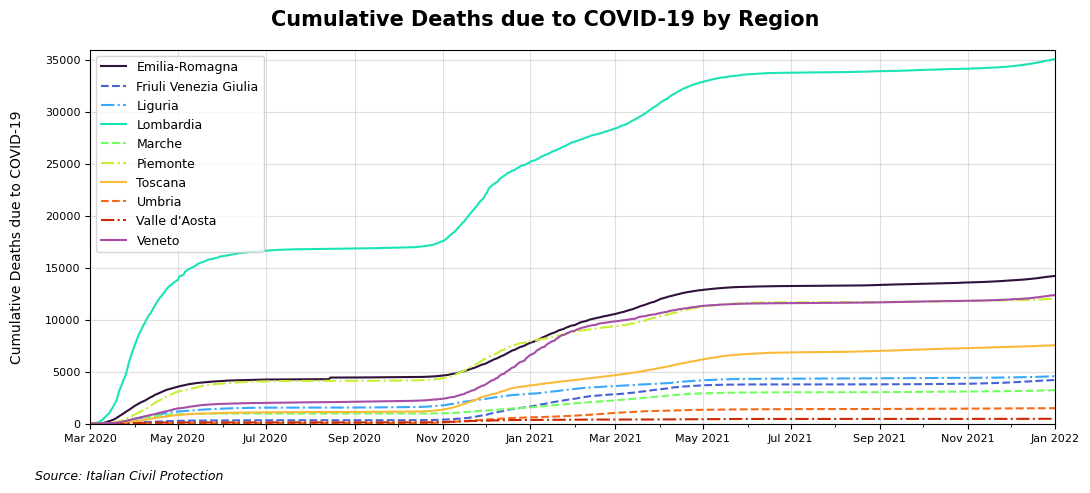

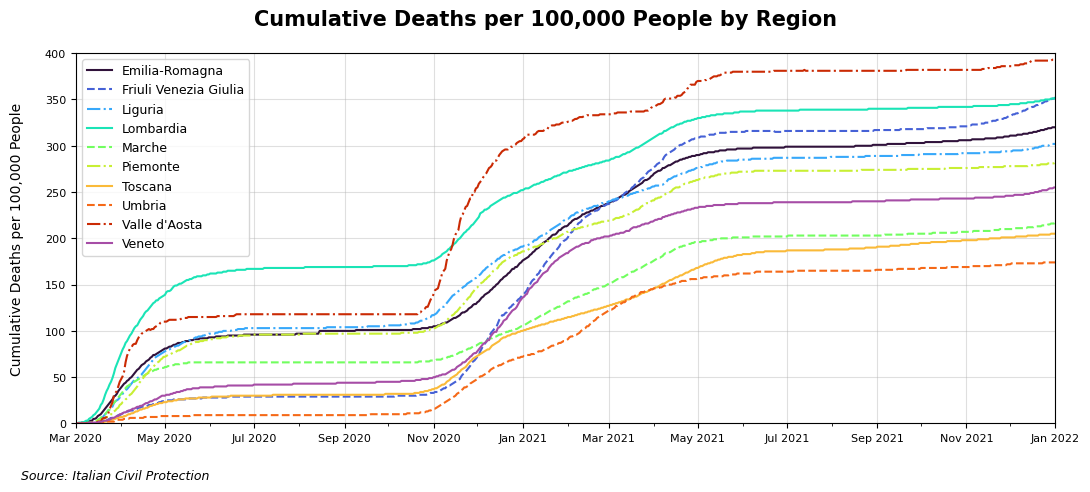

In [344]:
fig, ax = plt.subplots(figsize=(11, 5))

for i, (name, group) in enumerate(grouped):
    # Use the remainder operator to cycle through a list of 3 line styles
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 36000))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths due to COVID-19', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths due to COVID-19 by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='deceduti_100k', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 400))

plt.xlabel('', labelpad=15)
plt.ylabel('Cumulative Deaths per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('Cumulative Deaths per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9})

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('deaths_100k_reg')

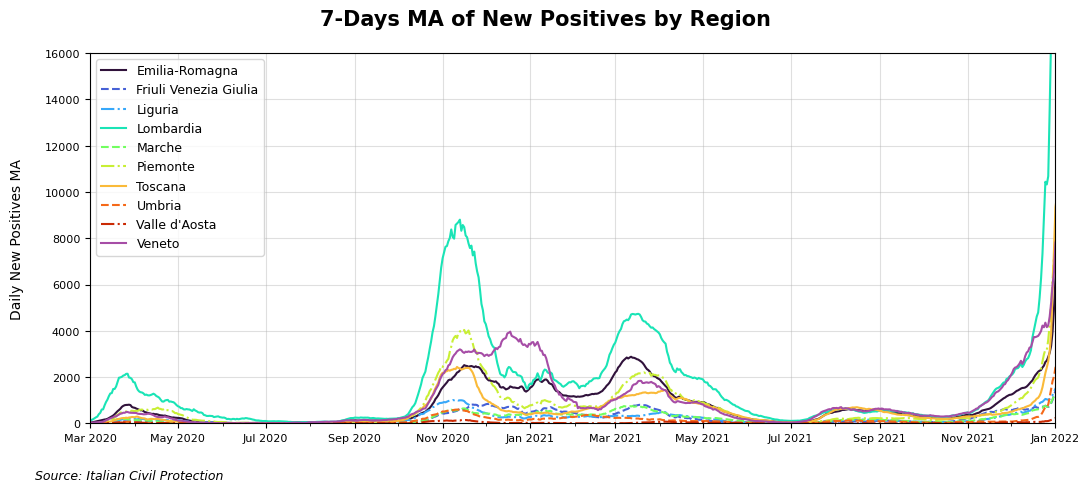

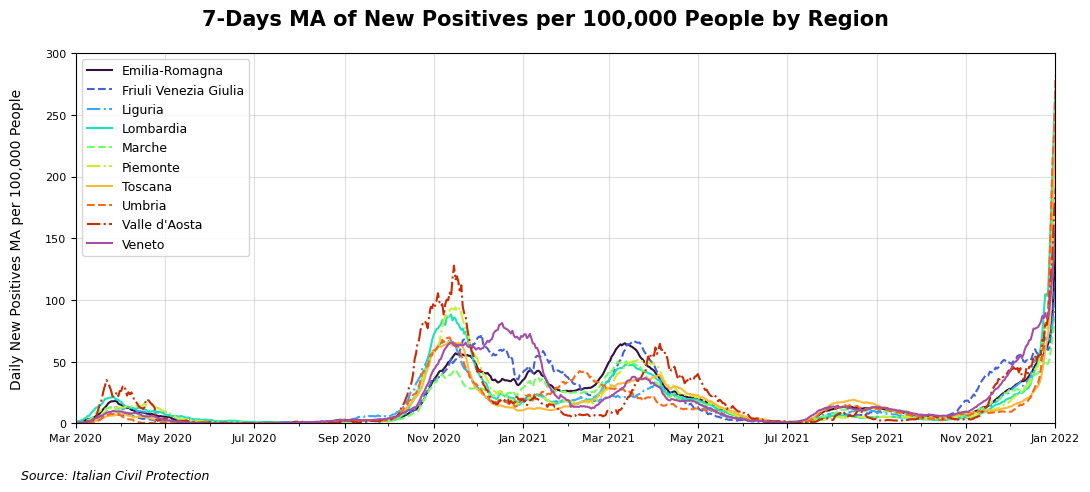

In [346]:
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 16000))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_reg')


###############################################################################

# Plot each province's data on the same plot
fig, ax = plt.subplots(figsize=(11, 5))
for i, (name, group) in enumerate(grouped):
    # Use a different line style for odd and even indices
    ls = ['-', '--', '-.'][i % 3]
    group.plot(x='data', y='nuovi_positivi_100k_ma', label=name, ax=ax, color=colors[i], ls=ls)

# Add plot labels and legend
date_fmt = DateFormatter('%b %Y')
locator = AutoDateLocator()
locator.intervald[3] = 2  # show every 3 months
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.tick_params(axis='x', rotation=0, labelsize=8)
ax.tick_params(axis='y', rotation=0, labelsize=8)
ax.xaxis.set_tick_params(which='minor', labelsize=0)
ax.set_xlim(('Mar 2020', 'Jan 2022'))
ax.set_ylim((0, 300))

plt.xlabel('', labelpad=15)
plt.ylabel('Daily New Positives MA per 100,000 People', labelpad=15, fontsize=10)
plt.suptitle('7-Days MA of New Positives per 100,000 People by Region', fontsize=15, fontweight='bold')
plt.grid(alpha=0.4)
plt.legend(markerscale=100, prop={'size': 9}, loc="upper left")

# Add the data source as a footnote
ax.text(0.04, -0.15, "Source: Italian Civil Protection", ha="center", fontsize=9, transform=ax.transAxes, fontstyle="italic")

save_fig('new_positives_100k_reg')